In [15]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [16]:
aal = pd.read_csv("DIS.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [17]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day
0,2012-01-04,34.193177,34.909454,34.130503,34.784103,9889900,0.0,0,2.159997,1.755139,...,0.709432,2.039529,0.465579,0.694294,1.996010,34.300621,33.673882,31.691248,26.293428,34.332928
1,2012-01-05,34.766203,35.437710,34.649807,35.366081,14327100,0.0,0,1.409544,1.533926,...,0.714610,2.020608,0.778952,0.693367,1.960542,34.784103,33.342602,32.237194,27.746346,35.187054
2,2012-01-06,35.410845,35.948054,35.321312,35.733170,14401600,0.0,0,1.673114,1.162302,...,0.713921,1.997921,0.787904,0.693593,1.941035,35.366081,33.763420,32.527767,28.204235,34.914082
3,2012-01-09,35.580957,36.037580,35.446654,35.589909,12145200,0.0,0,1.037967,1.142367,...,0.705149,1.981318,0.626741,0.694508,1.951418,35.733170,33.575394,32.430920,27.913652,34.737968
4,2012-01-10,35.348169,35.733167,35.061659,35.482471,14070900,0.0,0,-0.400919,1.167772,...,0.706932,1.992340,0.590927,0.695036,1.958814,35.589909,34.300621,32.668659,29.058380,34.782001


In [18]:
aal['Hl_pct'] = 100*(aal['High'].shift(1)-aal['Low'].shift(1))/aal['Close'].shift(1)
#aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
0,2012-01-04,34.784103,9889900,0.0,0,2.159997,1.755139,2.214884,1.940615,1.547398,...,2.039529,0.465579,0.694294,1.996010,34.300621,33.673882,31.691248,26.293428,34.332928,NaN
1,2012-01-05,35.366081,14327100,0.0,0,1.409544,1.533926,2.221591,1.932909,0.018792,...,2.020608,0.778952,0.693367,1.960542,34.784103,33.342602,32.237194,27.746346,35.187054,2.239389
2,2012-01-06,35.733170,14401600,0.0,0,1.673114,1.162302,2.150618,1.929450,0.294372,...,1.997921,0.787904,0.693593,1.941035,35.366081,33.763420,32.527767,28.204235,34.914082,2.227851
3,2012-01-09,35.589909,12145200,0.0,0,1.037967,1.142367,2.064073,1.929850,-0.253696,...,1.981318,0.626741,0.694508,1.951418,35.733170,33.575394,32.430920,27.913652,34.737968,1.753948
4,2012-01-10,35.482471,14070900,0.0,0,-0.400919,1.167772,2.062528,1.929747,0.226160,...,1.992340,0.590927,0.695036,1.958814,35.589909,34.300621,32.668659,29.058380,34.782001,1.660377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2021-07-26,178.740005,5641000,0.0,0,0.576711,2.189779,1.301551,2.030430,1.014545,...,1.605187,2.470001,3.615715,2.022890,176.139999,172.949997,175.330002,184.270004,117.610001,1.402294
2405,2021-07-27,179.500000,6684100,0.0,0,1.476102,1.740884,1.306834,2.031701,0.238220,...,1.604828,3.440002,3.618730,2.016006,178.740005,176.750000,177.929993,184.639999,116.309998,1.924585
2406,2021-07-28,179.100006,5926900,0.0,0,0.425196,1.754977,1.305519,2.030112,-0.471244,...,1.625659,2.989990,3.623691,2.023278,179.500000,176.889999,178.350006,183.389999,116.180000,1.665733
2407,2021-07-29,178.350006,6209100,0.0,0,-0.222838,1.754698,1.297170,2.030190,-0.018626,...,1.625518,2.800003,3.626230,2.033210,179.100006,175.130005,176.570007,185.330002,115.610001,1.563374


In [19]:
aal1 = aal1.set_index("Date")
aal1.index = pd.to_datetime(aal1.index)

In [6]:
print(len(aal1.columns))
aal1.dropna(inplace=True)
aal1 = aal1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(df, target):
    X = add_constant(df.loc[:, df.columns != target])
    res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
    return res
target = 'Close'
g_all=get_VIF(aal1, target).to_frame()
g_all
g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
g.columns = ['VIF']
g= g[g['VIF']<100]
g.reset_index
c=list(g.index.values)
#aal1=aal1[c]
#c.remove('const')
c.append('Close')
aal1 = aal1[c]
print(len(aal1.columns))
g

73


C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


38


,VIF
Volume,3.023428
Dividends,1.014897
daily_returns,6.079870
std_10,15.079289
std_45,45.546683
market_daily_returns,2.305406
beta,5.143071
residual_volatility,92.944378
ER_10,41.023999
ROC_10,16.322794


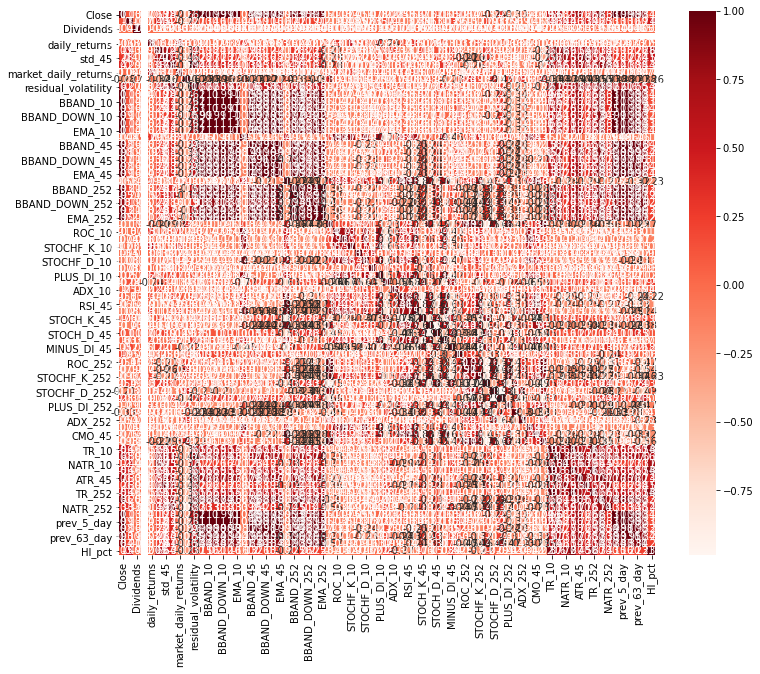

In [20]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
aal1

,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,beta,...,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day,Hl_pct
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,34.784103,9889900,0.0,0,2.159997,1.755139,2.214884,1.940615,1.547398,0.517072,...,2.039529,0.465579,0.694294,1.996010,34.300621,33.673882,31.691248,26.293428,34.332928,NaN
2012-01-05,35.366081,14327100,0.0,0,1.409544,1.533926,2.221591,1.932909,0.018792,0.517498,...,2.020608,0.778952,0.693367,1.960542,34.784103,33.342602,32.237194,27.746346,35.187054,2.239389
2012-01-06,35.733170,14401600,0.0,0,1.673114,1.162302,2.150618,1.929450,0.294372,0.517168,...,1.997921,0.787904,0.693593,1.941035,35.366081,33.763420,32.527767,28.204235,34.914082,2.227851
2012-01-09,35.589909,12145200,0.0,0,1.037967,1.142367,2.064073,1.929850,-0.253696,0.516743,...,1.981318,0.626741,0.694508,1.951418,35.733170,33.575394,32.430920,27.913652,34.737968,1.753948
2012-01-10,35.482471,14070900,0.0,0,-0.400919,1.167772,2.062528,1.929747,0.226160,0.516562,...,1.992340,0.590927,0.695036,1.958814,35.589909,34.300621,32.668659,29.058380,34.782001,1.660377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,178.740005,5641000,0.0,0,0.576711,2.189779,1.301551,2.030430,1.014545,0.974053,...,1.605187,2.470001,3.615715,2.022890,176.139999,172.949997,175.330002,184.270004,117.610001,1.402294
2021-07-27,179.500000,6684100,0.0,0,1.476102,1.740884,1.306834,2.031701,0.238220,0.977215,...,1.604828,3.440002,3.618730,2.016006,178.740005,176.750000,177.929993,184.639999,116.309998,1.924585
2021-07-28,179.100006,5926900,0.0,0,0.425196,1.754977,1.305519,2.030112,-0.471244,0.980509,...,1.625659,2.989990,3.623691,2.023278,179.500000,176.889999,178.350006,183.389999,116.180000,1.665733


In [22]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [23]:
aal_df = aal1[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [24]:
print(len(aal1.columns), len(rel_feat))

75 38


In [12]:
#aal_df = aal1.copy()

In [13]:
#aal_df=aal_df.drop(['Typical Price'], axis=1)

In [14]:
aal_close_px = aal_df['Close']

In [15]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


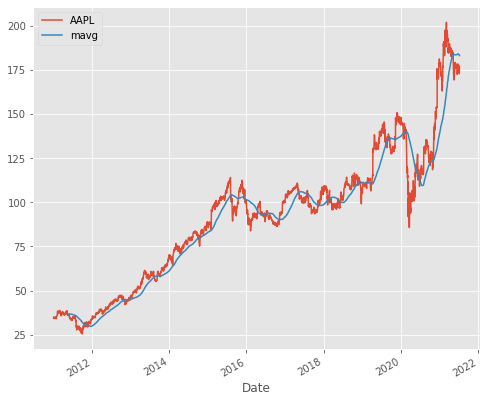

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

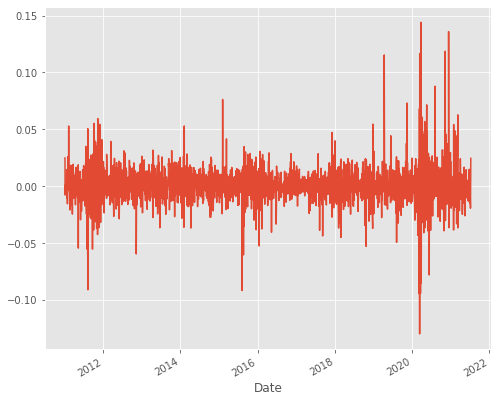

In [17]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [18]:
aal_df['prev_day'] = aal_df['Close'].shift(1)

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
aal_df = aal_df.iloc[1:]

In [20]:
# aal_df = aal_df.set_index("Date")

In [21]:
# aal_df = aal_df.set_index("Date")
# aal_df.index = pd.to_datetime(aal_df.index)
# aal_df.index[0]

In [22]:
# print(len(aal_df.columns))
# aal_df.fillna(value=-99999, inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# def get_VIF(df, target):
#     X = add_constant(df.loc[:, df.columns != target])
#     res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
#     return res
# target = 'Close'
# g_all=get_VIF(aal_df, target).to_frame()
# g_all
# g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
# g.reset_index
# c=list(g.index.values)
# #aal_df=aal_df[c]
# c.remove('const')
# c.append('Close')
# aal_df = aal_df[c]
# print(len(aal_df.columns))
# g

In [23]:
# g_all

In [24]:
# aal = aal[['Volume', 'std_45', 'PLUS_DI_252', 'std_252', 'prev_day',
#        'residual_volatility', 'MINUS_DI_252',"Close"]]
# aal_df = aal.copy()

In [26]:
# training test split
key = pd.Timestamp(2017, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [27]:
# aal_df = aal_df.iloc[1:,:]
#aal_df.drop(['Open', 'High',"Low"], axis=1, inplace = True)
aal_df

,Close,std_45,std_252,beta,residual_volatility,Typical Price,BBAND_10,BBAND_UP_10,BBAND_DOWN_10,SMA_10,...,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,prev_day,prev_5_day,prev_22_day,prev_63_day,prev_252_day
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,35.366081,2.221591,1.932909,0.517498,1.155669,34.608020,33.513613,34.997365,32.029862,33.513613,...,0.714610,2.020608,0.778952,0.693367,1.960542,34.784103,33.342602,32.237194,27.746346,35.187054
2012-01-06,35.733170,2.150618,1.929450,0.517168,1.151153,35.151199,33.811763,35.474614,32.148912,33.811763,...,0.713921,1.997921,0.787904,0.693593,1.941035,35.366081,33.763420,32.527767,28.204235,34.914082
2012-01-09,35.589909,2.064073,1.929850,0.516743,1.152599,35.667512,34.137668,35.909268,32.366068,34.137668,...,0.705149,1.981318,0.626741,0.694508,1.951418,35.733170,33.575394,32.430920,27.913652,34.737968
2012-01-10,35.482471,2.062528,1.929747,0.516562,1.152767,35.691381,34.388364,36.205549,32.571179,34.388364,...,0.706932,1.992340,0.590927,0.695036,1.958814,35.589909,34.300621,32.668659,29.058380,34.782001
2012-01-11,34.649811,2.031650,1.929849,0.514920,1.153407,35.425766,34.561165,36.438101,32.684229,34.561165,...,0.699155,2.017775,0.671508,0.695534,2.007324,35.482471,34.784103,31.629606,28.714962,34.693939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,178.740005,1.301551,2.030430,0.974053,1.823767,175.556666,179.276999,187.846405,170.707592,179.276999,...,2.869111,1.605187,2.470001,3.615715,2.022890,176.139999,172.949997,175.330002,184.270004,117.610001
2021-07-27,179.500000,1.306834,2.031701,0.977215,1.825531,177.620000,178.712999,186.496025,170.929973,178.712999,...,2.880666,1.604828,3.440002,3.618730,2.016006,178.740005,176.750000,177.929993,184.639999,116.309998
2021-07-28,179.100006,1.305519,2.030112,0.980509,1.823053,178.543335,178.298000,185.316011,171.279989,178.298000,...,2.911555,1.625659,2.989990,3.623691,2.023278,179.500000,176.889999,178.350006,183.389999,116.180000


In [27]:
 #!pip install -U statsmodels
#!pip install -U pandas


In [28]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [29]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [28]:
# # # model generation
xtrain.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<ipython-input-28-57b427f81183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain.dropna(inplace=True)


In [29]:
cols = xtrain.columns
cols

Index(['std_45', 'MINUS_DI_252', 'BBAND_DOWN_45', 'TR_45', 'ATR_45', 'SMA_45',
       'ATR_252', 'STOCHF_D_252', 'STOCH_D_252', 'BBAND_10', 'EMA_10', 'TR_10',
       'NATR_10', 'BBAND_DOWN_252', 'prev_day', 'BBAND_UP_45', 'beta',
       'NATR_45', 'BBAND_DOWN_10', 'SMA_252', 'NATR_252', 'Typical Price',
       'BBAND_UP_252', 'prev_63_day', 'BBAND_UP_10', 'EMA_45', 'EMA_252',
       'TR_252', 'prev_22_day', 'prev_252_day', 'prev_5_day', 'BBAND_45',
       'BBAND_252', 'SMA_10', 'ATR_10', 'std_252', 'residual_volatility'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [31]:
xtrain

array([[ 3.32878294,  1.22321097, -1.98667888, ..., -1.08042107,
         2.35801395,  1.92091816],
       [ 3.11615568,  1.17384279, -1.99100275, ..., -1.14807822,
         2.34631858,  1.88881533],
       [ 2.85687667,  1.11487011, -1.99179215, ..., -1.19640496,
         2.34767119,  1.89909741],
       ...,
       [ 0.51684911,  0.45170137,  0.85121003, ...,  1.57429123,
        -0.95129592,  0.1252689 ],
       [ 0.50592344,  0.45429664,  0.86398038, ...,  1.54279597,
        -0.94977163,  0.12873333],
       [ 0.4952961 ,  0.47028195,  0.87919395, ...,  1.44831178,
        -0.95479186,  0.12945619]])

In [32]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
from sklearn import linear_model
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)
clflass = linear_model.Lasso(alpha=0.1)
clflass.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [33]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=2)

In [34]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)
clflass.score(xtest, ytest)

The linear regression confidence is  0.9790285078832456
The quadratic regression 2 confidence is  0.9794526254044656
The quadratic regression 3 confidence is  0.006039619209643243
The knn regression confidence is  -0.6464208136217955


0.988723609539258

In [35]:
forecast_set = clfreg.predict(xtest)
Forecast = pd.DataFrame()
Forecast['Forecast'] = np.nan
Forecast['Date']=aal_df.index
Forecast=Forecast.set_index('Date')

In [36]:
forecast_set
Forecast['Forecast']

Date
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
2012-01-10   NaN
2012-01-11   NaN
              ..
2021-07-26   NaN
2021-07-27   NaN
2021-07-28   NaN
2021-07-29   NaN
2021-07-30   NaN
Name: Forecast, Length: 2408, dtype: float64

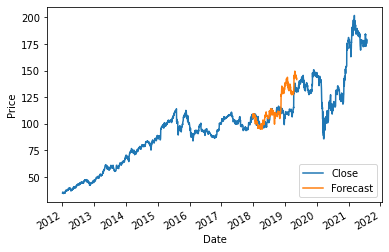

KeyError: 'Forecast'

In [37]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = key
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    Forecast.loc[next_date] = [i]
aal1['Close'].plot()
Forecast['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [38]:
print(next_unix)

2019-05-17 00:00:00


In [39]:
print(clfreg.coef_)

[ 1.67360117e-01  4.17151096e-01 -3.37819482e-01 -3.76688729e-04
  2.26348985e-01 -6.30939149e-01  2.45855251e+00  1.99436848e-01
  8.97204725e-01  1.38827487e+00 -1.10463536e+01 -3.76688729e-04
 -5.07066312e-01  3.04139124e+00  1.51321782e+01 -8.86879920e-01
  4.33012808e-01 -9.69885733e-02  1.15282121e+00  4.50057761e+00
 -3.10091506e+00  5.43650013e+00  5.70228912e+00  9.22443968e-01
  1.60836969e+00  1.03149084e+01 -2.25989032e+01 -3.76688729e-04
  1.50436164e-01  5.68523667e-01  6.80773316e-01 -6.30939149e-01
  4.50057761e+00  1.38827487e+00  6.11199572e-01  2.40009153e+00
 -1.23352477e+00]


In [40]:
print(clfreg.intercept_)

78.77132392483354


In [41]:
xtrain.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [42]:
coeff = dict(zip(cols, clfreg.coef_))


In [43]:

coeff

{'std_45': 0.16736011662480496,
 'MINUS_DI_252': 0.4171510958315978,
 'BBAND_DOWN_45': -0.33781948165978587,
 'TR_45': -0.00037668872871338653,
 'ATR_45': 0.2263489845468252,
 'SMA_45': -0.630939149273297,
 'ATR_252': 2.4585525138020268,
 'STOCHF_D_252': 0.19943684835502823,
 'STOCH_D_252': 0.8972047248918285,
 'BBAND_10': 1.3882748709250603,
 'EMA_10': -11.046353556183085,
 'TR_10': -0.0003766887287370343,
 'NATR_10': -0.5070663117699044,
 'BBAND_DOWN_252': 3.0413912435564296,
 'prev_day': 15.132178200876085,
 'BBAND_UP_45': -0.8868799203368863,
 'beta': 0.43301280828218697,
 'NATR_45': -0.09698857332688739,
 'BBAND_DOWN_10': 1.1528212079683353,
 'SMA_252': 4.500577610583431,
 'NATR_252': -3.1009150592874097,
 'Typical Price': 5.436500129471166,
 'BBAND_UP_252': 5.70228912228995,
 'prev_63_day': 0.9224439677848597,
 'BBAND_UP_10': 1.608369690899322,
 'EMA_45': 10.314908393918055,
 'EMA_252': -22.59890316733726,
 'TR_252': -0.0003766887288347339,
 'prev_22_day': 0.15043616377543656,
 '

In [44]:
factors = dict(sorted(coeff.items(), key=lambda item: abs(item[1]), reverse = True))
factors_dict = {"features":factors.keys(), "regression coeff":factors.values()}
factors_df = pd.DataFrame(factors_dict)
factors_df

,features,regression coeff
0,EMA_252,-22.598903
1,prev_day,15.132178
2,EMA_10,-11.046354
3,EMA_45,10.314908
4,BBAND_UP_252,5.702289
5,Typical Price,5.436500
6,BBAND_252,4.500578
7,SMA_252,4.500578
8,NATR_252,-3.100915
9,BBAND_DOWN_252,3.041391


In [43]:
aal_df

,residual_volatility,MINUS_DI_252,ATR_10,Close,prev_day
Date,,,,,
2011-01-06,0.956838,20.837503,0.502798,34.914082,35.187054
2011-01-07,0.957328,20.904623,0.510723,34.737968,34.914082
2011-01-10,0.950595,20.971373,0.525692,34.782001,34.737968
2011-01-11,0.947872,20.887194,0.536259,34.693939,34.782001
2011-01-12,0.948221,20.909501,0.543303,34.491413,34.693939
...,...,...,...,...,...
2021-07-02,1.802146,20.527821,2.858998,177.110001,177.259995
2021-07-06,1.805632,20.636017,3.052998,173.690002,177.110001
2021-07-07,1.806627,20.580227,3.050999,172.820007,173.690002


In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
clfreg = LinearRegression()
clfreg.fit(xtrain, ytrain)

In [ ]:
clfreg.score(xtrain, ytrain)

In [ ]:
clfreg.score(xtest, ytest)

In [ ]:
ytrain